<a href="https://colab.research.google.com/github/ocean5apphotmail/googledrive/blob/main/%E7%A5%9E%E7%BB%8F%E7%BD%91%E7%BB%9C%E5%88%86%E7%B1%BB%E4%BB%BB%E5%8A%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Mnist分类任务：

- 网络基本构建与训练方法，常用函数解析

- torch.nn.functional模块

- nn.Module模块


### 读取Mnist数据集
- 会自动进行下载

In [ ]:
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from pathlib import Path
import requests

DATA_PATH = Path("/content/drive/MyDrive/PyTorch框架实战的资料/第二章：神经网络实战分类与回归任务/神经网络实战分类与回归任务/data/")
PATH = DATA_PATH / "mnist"

PATH.mkdir(parents=True, exist_ok=True)

URL = "http://deeplearning.net/data/mnist/"
FILENAME = "mnist.pkl.gz"

if not (PATH / FILENAME).exists():
        content = requests.get(URL + FILENAME).content
        (PATH / FILENAME).open("wb").write(content)


In [ ]:
import pickle
import gzip

with gzip.open((PATH / FILENAME).as_posix(), "rb") as f:
        ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding="latin-1")

784是mnist数据集每个样本的像素点个数

(50000, 784)


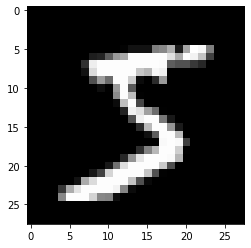

In [ ]:
from matplotlib import pyplot
import numpy as np

pyplot.imshow(x_train[0].reshape((28, 28)), cmap="gray")
print(x_train.shape)

In [ ]:
<img src="./content/drive/MyDrive/PyTorch框架实战的资料/第二章：神经网络实战分类与回归任务/神经网络实战分类与回归任务/img/4.png" alt="FAO" width="790">

SyntaxError: ignored

In [ ]:
<img src="/content/drive/MyDrive/PyTorch框架实战的资料/第二章：神经网络实战分类与回归任务/神经网络实战分类与回归任务/img/4.png" alt="FAO" width="790">

SyntaxError: ignored

注意数据需转换成tensor才能参与后续建模训练

In [ ]:
import torch

x_train, y_train, x_valid, y_valid = map(
    torch.tensor, (x_train, y_train, x_valid, y_valid)
)
n, c = x_train.shape
x_train, x_train.shape, y_train.min(), y_train.max()
print(x_train, y_train)
print(x_train.shape)
print(y_train.min(), y_train.max())

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]]) tensor([5, 0, 4,  ..., 8, 4, 8])
torch.Size([50000, 784])
tensor(0) tensor(9)


### torch.nn.functional 很多层和函数在这里都会见到

torch.nn.functional中有很多功能，后续会常用的。那什么时候使用nn.Module，什么时候使用nn.functional呢？一般情况下，如果模型有可学习的参数，最好用nn.Module，其他情况nn.functional相对更简单一些

In [ ]:
import torch.nn.functional as F

loss_func = F.cross_entropy

def model(xb):
    return xb.mm(weights) + bias

In [ ]:
bs = 64
xb = x_train[0:bs]  # a mini-batch from x
yb = y_train[0:bs]
weights = torch.randn([784, 10], dtype = torch.float,  requires_grad = True) 
bs = 64
bias = torch.zeros(10, requires_grad=True)

print(loss_func(model(xb), yb))

tensor(14.1973, grad_fn=<NllLossBackward0>)


### 创建一个model来更简化代码

- 必须继承nn.Module且在其构造函数中需调用nn.Module的构造函数
- 无需写反向传播函数，nn.Module能够利用autograd自动实现反向传播
- Module中的可学习参数可以通过named_parameters()或者parameters()返回迭代器

In [ ]:
from torch import nn

class Mnist_NN(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden1 = nn.Linear(784, 128)
        self.hidden2 = nn.Linear(128, 256)
        self.out  = nn.Linear(256, 10)

    def forward(self, x):
        x = F.relu(self.hidden1(x))
        x = F.relu(self.hidden2(x))
        x = self.out(x)
        return x
        

In [ ]:
net = Mnist_NN()
print(net)

Mnist_NN(
  (hidden1): Linear(in_features=784, out_features=128, bias=True)
  (hidden2): Linear(in_features=128, out_features=256, bias=True)
  (out): Linear(in_features=256, out_features=10, bias=True)
)


可以打印我们定义好名字里的权重和偏置项

In [ ]:
for name, parameter in net.named_parameters():
    print(name, parameter,parameter.size())

hidden1.weight Parameter containing:
tensor([[ 0.0074, -0.0058,  0.0177,  ..., -0.0129, -0.0020, -0.0009],
        [ 0.0264,  0.0122,  0.0149,  ...,  0.0021,  0.0341,  0.0042],
        [ 0.0078,  0.0145,  0.0348,  ..., -0.0239, -0.0226, -0.0323],
        ...,
        [ 0.0160,  0.0250, -0.0323,  ..., -0.0297,  0.0303, -0.0209],
        [ 0.0047,  0.0254,  0.0092,  ..., -0.0085, -0.0154, -0.0029],
        [ 0.0190,  0.0272, -0.0166,  ...,  0.0250, -0.0024, -0.0354]],
       requires_grad=True) torch.Size([128, 784])
hidden1.bias Parameter containing:
tensor([ 2.9578e-02, -1.9130e-02,  6.7737e-03, -8.5896e-03,  4.7614e-03,
        -1.9045e-02,  3.2554e-02, -1.8163e-02, -2.4809e-02, -2.8927e-02,
         1.3337e-02, -1.7811e-02,  1.9216e-02,  1.6912e-02, -1.7674e-02,
        -1.7054e-02, -1.5411e-02,  2.2907e-02, -1.9960e-02, -2.0547e-02,
        -2.7141e-02,  2.5162e-02,  2.9310e-02,  2.4204e-02, -7.7914e-03,
        -1.6873e-02, -2.3360e-02, -3.2451e-02, -9.3955e-03,  3.4255e-02,
      

### 使用TensorDataset和DataLoader来简化

In [ ]:
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

train_ds = TensorDataset(x_train, y_train)
train_dl = DataLoader(train_ds, batch_size=bs, shuffle=True)

valid_ds = TensorDataset(x_valid, y_valid)
valid_dl = DataLoader(valid_ds, batch_size=bs * 2)

In [ ]:
def get_data(train_ds, valid_ds, bs):
    return (
        DataLoader(train_ds, batch_size=bs, shuffle=True),
        DataLoader(valid_ds, batch_size=bs * 2),
    )

- 一般在训练模型时加上model.train()，这样会正常使用Batch Normalization和 Dropout
- 测试的时候一般选择model.eval()，这样就不会使用Batch Normalization和 Dropout

In [ ]:
import numpy as np

def fit(steps, model, loss_func, opt, train_dl, valid_dl):
    for step in range(steps):
        model.train()
        for xb, yb in train_dl:
            loss_batch(model, loss_func, xb, yb, opt)

        model.eval()
        with torch.no_grad():
            losses, nums = zip(
                *[loss_batch(model, loss_func, xb, yb) for xb, yb in valid_dl]
            )
        val_loss = np.sum(np.multiply(losses, nums)) / np.sum(nums)
        print('当前step:'+str(step), '验证集损失：'+str(val_loss))

In [ ]:
from torch import optim
def get_model():
    model = Mnist_NN()
    return model, optim.SGD(model.parameters(), lr=0.001)

In [ ]:
def loss_batch(model, loss_func, xb, yb, opt=None):
    loss = loss_func(model(xb), yb)

    if opt is not None:
        loss.backward()
        opt.step()
        opt.zero_grad()

    return loss.item(), len(xb)

### 三行搞定！

In [ ]:
train_dl, valid_dl = get_data(train_ds, valid_ds, bs)
model, opt = get_model()
fit(25, model, loss_func, opt, train_dl, valid_dl)

当前step:0 验证集损失：2.280729072570801
当前step:1 验证集损失：2.2513272563934326
当前step:2 验证集损失：2.208267482376099
当前step:3 验证集损失：2.140430821228027
当前step:4 验证集损失：2.0305326766967773
当前step:5 验证集损失：1.8567247203826904
当前step:6 验证集损失：1.614151693534851
当前step:7 验证集损失：1.3473711465835572
当前step:8 验证集损失：1.1164636247634887
当前step:9 验证集损失：0.9429685171127319
当前step:10 验证集损失：0.8178746192932129
当前step:11 验证集损失：0.7268859283447265
当前step:12 验证集损失：0.6578291007041931
当前step:13 验证集损失：0.604813906955719
当前step:14 验证集损失：0.5622031031608582
当前step:15 验证集损失：0.5275872887134552
当前step:16 验证集损失：0.4991207275867462
当前step:17 验证集损失：0.47516186270713806
当前step:18 验证集损失：0.4558758644580841
当前step:19 验证集损失：0.4385730712890625
当前step:20 验证集损失：0.42354336495399475
当前step:21 验证集损失：0.4108560535430908
当前step:22 验证集损失：0.3995968002796173
当前step:23 验证集损失：0.390026313328743
当前step:24 验证集损失：0.3813281128883362
